## Plotting results in Julia

More documentation about the `Plots` package is [here](https://docs.juliaplots.org/latest/tutorial/). There are infinite ways of customizing the plots, feel free to explore. 

> NOTE:
> If you prefer this tutorial as a `.jl` file, just copy out the
> code bits and execute them there, with `#%%` to separate cells.

In [18]:
using Pkg;
Pkg.activate(".") # activate the environment in the "modelling" folder
Pkg.instantiate() # install the packages in the environment

  Activating project at `c:\Users\marai\OneDrive\Dokumente\Master\Masterarbeit\adv_env_econ_24\modelling`


The new packages that we use here are `Plots` and `LaTeXStrings`, the latter for formatting mathematical symbols nicely.

In [19]:
using Plots
using LaTeXStrings

Optional!!! Own command (MS):In case the Optimized Model has be run before, we have to delete OptMimi2016R2 and instead add MimiDICE2016R2.

In [20]:
Pkg.rm("OptMimiDICE2016R2MimiDICE2016R2")
Pkg.add(url="https://github.com/anthofflab/MimiDICE2016R2.jl")

Pkg.Types.PkgError: The following package names could not be resolved:
 * OptMimiDICE2016R2MimiDICE2016R2 (not found in project or manifest)

As usual, let's load an instance of the DICE model.

In [80]:
using Mimi
using MimiDICE2016R2

In [81]:
m_DICE = MimiDICE2016R2.get_model()
run(m_DICE)

Let's extract the time steps of the model into a vector.

In [82]:
timesteps = collect(Mimi.dimension(m_DICE, :time))
timesteps = [x[1] for x in timesteps];

Let's extract the emissions and temperature variables of the model into vectors.

In [83]:
E = m_DICE[:emissions, :E];
T = m_DICE[:climatedynamics, :TATM];

Let's make a simple plot. Note that both emissions and temperature are on the same y axis, which makes temperature changes hard to discern.

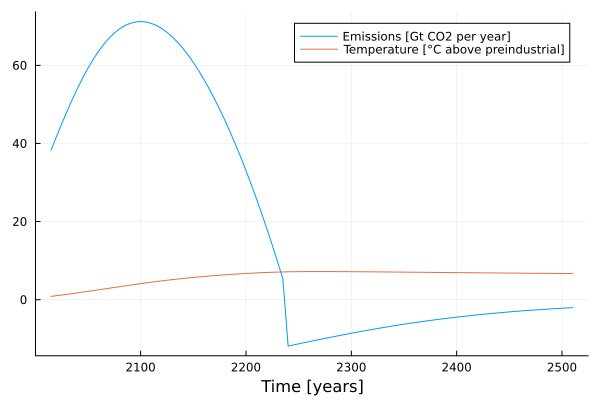

In [84]:
plot(timesteps, [E T], label=["Emissions [Gt CO2 per year]" "Temperature [°C above preindustrial]"], xlabel="Time [years]")

Let's extract Agricultural Emissions and Temperature variables of the model in vectors.

In [85]:
CUMETREE = m_DICE[:emissions, :CUMETREE];
T = m_DICE[:climatedynamics, :TATM];

Let's make a simple plot.

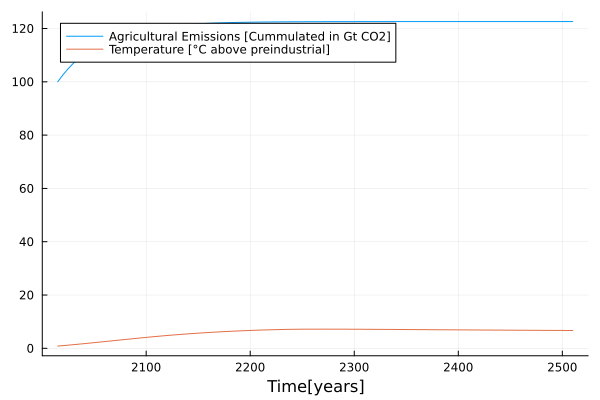

In [87]:
plot(timesteps, [CUMETREE T], label=["Agricultural Emissions [Cummulated in Gt CO2]" "Temperature [°C above preindustrial]"], xlabel="Time[years]")

Instead, with some more advanced plotting, we can also create a plot with two y axes but a shared x axis. This allows us to portray emissions and temperature on the same x axis, but on their respective y axes.

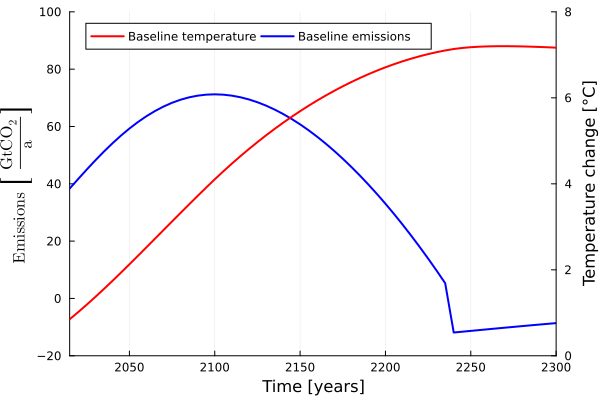

In [75]:
pE = plot(timesteps, E, label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=:blue, lw=2)
pT = twinx()
plot!(pT, timesteps, T, label="Baseline temperature", color=:red, lw=2, ylabel="Temperature change [°C]")
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2)
xlims!((2015, 2300))
ylims!(pE, (-20, 100))
ylims!(pT, (0, 8))
plot!(pT, legendcolumns=2)

Now let's change climate sensitivity and see how results change.

In [37]:
m_lowCS = MimiDICE2016R2.get_model()
update_param!(m_lowCS, :climatedynamics, :t2xco2, 2)
run(m_lowCS)

In [38]:
E_lowCS = m_lowCS[:emissions, :E];
T_lowCS = m_lowCS[:climatedynamics, :TATM];

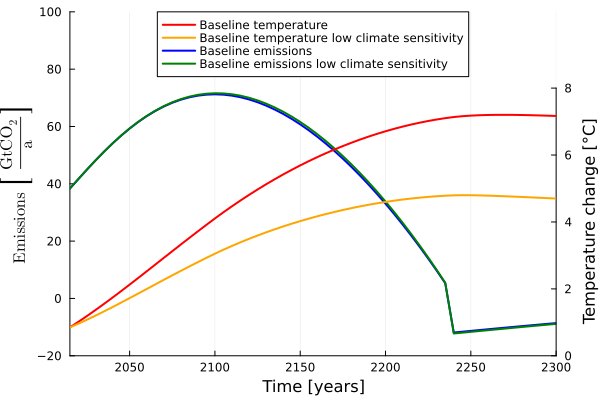

In [39]:
pE = plot(timesteps, [E E_lowCS], label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=[:blue :green], lw=2)
pT = twinx()
plot!(pT, timesteps, [T T_lowCS], label=["Baseline temperature" "Baseline temperature low climate sensitivity"], color=[:red :orange], lw=2, ylabel="Temperature change [°C]")
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2)
plot!(pT, [], [], label="Baseline emissions low climate sensitivity", linecolor=:green, lw=2)
xlims!((2015, 2300))
ylims!(pE, (-20, 100))
ylims!(pT, (0, 8))
plot!(pT, legend=:outertop, legendcolumns=1)

Let's try to understand this:

1. Temperatures are lower in a case of lower climate sensitivity — this makes total sense.
2. Emissions change a little, but not much. Why? In a welfare-optimising model, a lower climate sensitivity would lead to higher emissions — as the damages per emissions are lower, the social planner would be ready to accept more of them. But this version of DICE here does not optimise, so we shouldn't expect a change in emissions. To see this emissions reaction as a result of welfare optimisation, we'd need to rerun the code with OptMimiDICE2016R2, and run `optimise_model` after changing parameters. But why are the two emissions trajectories still not identical? The reason is that lower climate sensitivity leads to lower temperatures and hence lower damages. Lower damages imply higher GDP and emissions depend on GDP, hence they are slightly higher in the case of low climate sensitivity.

Let's try to change the Climate Sensitivity again. Now we assume that it is very high.

In [88]:
m_highCS = MimiDICE2016R2.get_model()
update_param!(m_highCS, :climatedynamics, :t2xco2, 5.5)
run(m_highCS)

In [89]:
E_highCS = m_highCS[:emissions, :E];
T_highCS = m_highCS[:climatedynamics, :TATM];

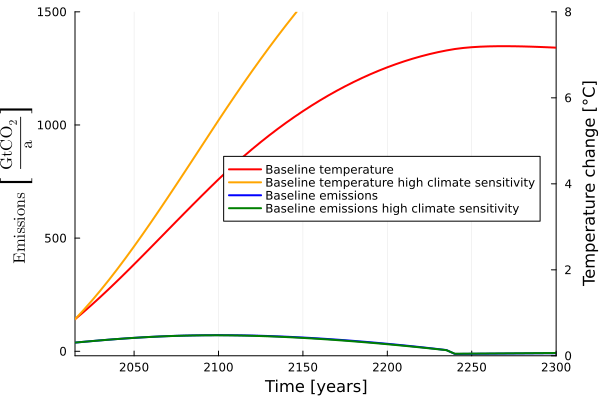

In [94]:
pE = plot(timesteps, [E E_highCS], label=nothing, xlabel="Time [years]", ylabel=latexstring("\\mathrm{Emissions} \\ \\ \\left[\\frac{\\mathrm{Gt CO}_2}{\\mathrm{a}}\\right]"), color=[:blue :green], lw=2)
pT = twinx()
plot!(pT, timesteps, [T T_highCS], label=["Baseline temperature" "Baseline temperature high climate sensitivity"], color=[:red :orange], lw=2, ylabel="Temperature change [°C]")
plot!(pT, [], [], label="Baseline emissions", linecolor=:blue, lw=2)
plot!(pT, [], [], label="Baseline emissions high climate sensitivity", linecolor=:green, lw=2)
xlims!((2015, 2300))
ylims!(pE, (-20, 1500))
ylims!(pT, (0, 8))
plot!(pT, legend=:right, legendcolumns=1)